**Introduction**

>Creating a Convolutional neural network for Making out the patterns in the training data set regarding the ASL(American Sign language)-Alphabets and using that model to make predictions

Importing the data(the dataset has been already uploaded in the google drive so we can excess it easily) the data we are using is from the Kaggel which u can access [here](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). So before running the programme do the same 

In [34]:
import zipfile
# Importing the zip file and unzipping it
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/asl.zip")
zip_ref.extractall()
zip_ref.close()

In [35]:
! ls data

asl_alphabet_test  asl_alphabet_train


**Multiclass Classification**: Let's break it down We just went through a whirlwind of steps:

Become one with the data (visualize, visualize, visualize...)

Preprocess the data (prepare it for a model and turn our data into batches)

Create a model (start with a baseline)

Fit the model

Evaluate the model

Adjust different parameters and improve model (try to beat your baseline)

Repeat until satisfied

## Inspect the data: 
The data provided is to be inspecte dto get to know about the data 

In [39]:
import os

for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'data' .
There are 29 directories and 0 images in 'data/asl_alphabet_train' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/R' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/I' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/P' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/Y' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/U' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/O' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/X' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/K' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/J' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/Q' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/A' .
There are 0 directories and 3000 images in 'data/asl_alphabet_train/W' .
There 

In [46]:
# Get the calssnames programmtically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/data/asl_alphabet_train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the sundirectorie
print(class_names) 

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


In [47]:
# Let's Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
def view_random_images(target_dir, target_class):
  # Setup the target directory(we'll view images from here)
  target_folder = target_dir + "/" + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #Read in the images and plot it using matplot lib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape :{img.shape}")
  return img

['B2090.jpg']
Image shape :(200, 200, 3)


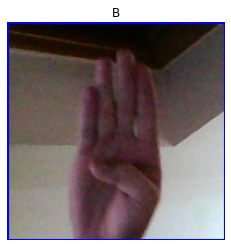

In [72]:
img = view_random_images(target_dir="data/asl_alphabet_train", target_class= "B")

In [55]:
img.shape

(200, 200, 3)

In [80]:
img.max()


255

> If we know the maximum value that the tensor is made of so we could do `Normalization or rescalling` ( by dividing the values of the tensor by the maximum value). The rescalling is done to make the model better understand the training data

In [77]:
# as we can see the images have max tensor value 255 so we need to scale the images for better results

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# make the directories for the train and test

train_dir = "data/asl_alphabet_train"
test_dir = "data/asl_alphabet_test"

# rescalling
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

# Importing the data
print("For the training:")
train_data =  train_datagen.flow_from_directory(directory = train_dir,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = "categorical",
                                                subset = "training")
print("For the validation:")
# making validation dataset
validation_data = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode = "categorical",
                                                    subset = "validation")



For the training:
Found 69600 images belonging to 29 classes.
For the validation:
Found 17400 images belonging to 29 classes.


In [61]:
class_names,len(class_names)

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
        'del', 'nothing', 'space'], dtype='<U7'), 29)

In [79]:
# make a base model with 1 Conv2D and MaxPool2D layes

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters = 10,
                                                      kernel_size = 3,
                                                      strides = 1,
                                                      activation = "relu",
                                                      input_shape = (224,224, 3)),
                               tf.keras.layers.MaxPool2D(), # Keep all the parameters to default
                               tf.keras.layers.Conv2D(10, 3, 1, activation = "relu"),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(29, activation = "softmax")  # 29 outputs
])

# compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)
                        )

Epoch 1/5
2175/2175 [==============================] - 163s 75ms/step - loss: 0.8543 - accuracy: 0.7549 - val_loss: 1.7211 - val_accuracy: 0.4974
Epoch 2/5
2175/2175 [==============================] - 161s 74ms/step - loss: 0.1686 - accuracy: 0.9495 - val_loss: 2.1297 - val_accuracy: 0.5397
Epoch 3/5
2175/2175 [==============================] - 161s 74ms/step - loss: 0.0883 - accuracy: 0.9731 - val_loss: 1.9329 - val_accuracy: 0.5456
Epoch 4/5
2175/2175 [==============================] - 161s 74ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 2.0289 - val_accuracy: 0.5741
Epoch 5/5
2175/2175 [==============================] - 160s 74ms/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 2.2879 - val_accuracy: 0.5845


In [82]:
# plot the validation and training curve seperately
def plot_loss_curves(history):
  """
  Return seperate loss curve for training and validation
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) #how many epochs did we run for
  # plot the losses
  plt.plot(epochs, loss, label ="training loss")
  plt.plot(epochs, val_loss, label ="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot the accuracy
  plt.figure() # when ever you want a seperate curve 
  plt.plot(epochs, accuracy, label ="training accuracy")
  plt.plot(epochs, val_accuracy, label ="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

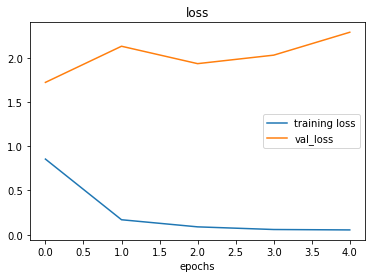

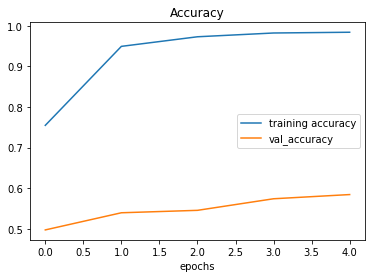

In [83]:
plot_loss_curves(history_1)

>Whenever the validation loss curve starts to increase or in other words we can say that it does not decrease that much we can say that the model has `Overfitted` the data and the ability of model to generalize the data has diminished. we can also say that if the loss curve of validation data and training had large discripenscy or they vary by a large amount we can say that the model is overfitting we can see that in our graph as well if we see the loss curve

Adjust the model parameters:
* Create a baseline
* Beat the baseline by overfitting the larger model
* Reduce the Overitting of the data


Overfit methods:

* Increase the number of Conv layers
* Increase the number of Conv Filters
* Add another dense layer to the output of the flatten layer

Reduce the Overfitting of data (it is also known as Regulization)

* Add data Augmentation
* Add regulization layers ( such as MaxPool2D)
* Add more data ...

In [86]:
# MAKE AN ATTEMP TO MAKE THE MODEL BETTER:(using option 2 to make model better and reduce overfitting)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters = 16,
                                                      kernel_size = 3,
                                                      padding = "same",
                                                      strides = 1, 
                                                      activation = "relu", 
                                                      input_shape = (224, 224, 3)),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(32, 3, 1, padding = "same", activation = "relu"),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(64, 3, 1, padding = "same", activation = "relu"),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(128, activation = "relu"),
                               tf.keras.layers.Dense(29, activation = "softmax")
])

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                )

history_2 = model_2.fit(train_data,
                        epochs = 3,
                        steps_per_epoch=len(train_data),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)
                        )

Epoch 1/3
2175/2175 [==============================] - 166s 76ms/step - loss: 0.6802 - accuracy: 0.7951 - val_loss: 1.2087 - val_accuracy: 0.6472
Epoch 2/3
2175/2175 [==============================] - 162s 74ms/step - loss: 0.0768 - accuracy: 0.9752 - val_loss: 1.3768 - val_accuracy: 0.6808
Epoch 3/3
2175/2175 [==============================] - 162s 74ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 1.8768 - val_accuracy: 0.6735


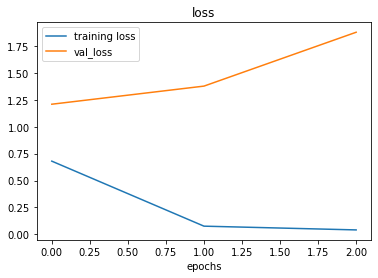

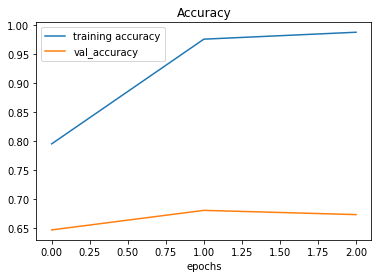

In [87]:
plot_loss_curves(history_2)

In [91]:
#  we can try to reduce the filter layers s=to reduce the overftting and use augmeneted data:


# Create ImageDataGenerator training instances with data Augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                              rotation_range = 20, # rotate the image between the range of 0 to 20 degree randomly
                                              zoom_range = 0.2, # zoom into the image
                                              width_shift_range = 0.2, #Shift the image slightly width wise
                                              height_shift_range =0.2, # shift the image height wise
                                              horizontal_flip = True, # Flip the image on the horizontal axis
                                              validation_split = 0.2) 


print("Training Images")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                    target_size = (224, 224),
                                                                    batch_size = 32,
                                                                    class_mode = "categorical",
                                                                    subset = "training")


print("Validation Images")
validation_data = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical",
                                             subset = "validation")

Training Images
Found 69600 images belonging to 29 classes.
Validation Images
Found 17400 images belonging to 29 classes.


In [96]:
# set seed

tf.random.set_seed(42)

# Instanciate the model

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(10, 3, 1, padding = "same",activation = "relu", input_shape = (224, 224, 3)),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(10, 3, 1, activation = "relu", padding = "same"),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Conv2D(10, 3, 1, activation = "relu", padding = "same"),
                               tf.keras.layers.MaxPool2D(),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(29, activation = "softmax")

])

# compile the model
model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]
                )
# fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs = 3,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = validation_data,
                        validation_steps = len(validation_data)

                        )

Epoch 1/3
2175/2175 [==============================] - 937s 431ms/step - loss: 2.7116 - accuracy: 0.2118 - val_loss: 2.5749 - val_accuracy: 0.2166
Epoch 2/3
2175/2175 [==============================] - 926s 426ms/step - loss: 1.9571 - accuracy: 0.3987 - val_loss: 2.2968 - val_accuracy: 0.2997
Epoch 3/3
2175/2175 [==============================] - 924s 425ms/step - loss: 1.7165 - accuracy: 0.4654 - val_loss: 2.2333 - val_accuracy: 0.3301


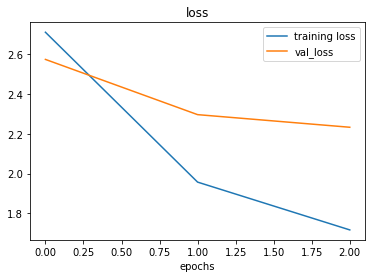

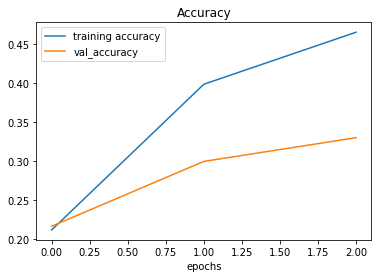

In [97]:
plot_loss_curves(history_3)

In [103]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 112, 112, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 56, 56, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 10)        910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 28, 10)     

In [99]:
# lets make a prediction
# as we have made the load_prep_pred_plot function but its for binary classification lets take that for multiclass classification
def load_prep_pred_plot(model, filename, class_names = class_names, img_size = 224):
  """Read the image , make shape changes to the images so that it can be read by the model and predict the class and plot the image withg predicted labels
  """
  # Read the images
  img = tf.io.read_file(filename)
  # Decode the image
  img = tf.image.decode_image(img, channels = 3)
  # Resize the image
  img = tf.image.resize(img, [img_size, img_size])
  # rescalling the image
  img = img/255.
  # pred the image and we get prediction_probabilities
  pred = model.predict(tf.expand_dims(img, axis = 0))
  # Make if statefor the multiclass classification
  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()] #if more than one output print max one
  else:
    pred_class = class_names[tf.round(pred)] # if only one class we have to rounf towards max and print
  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction :{pred_class}")
  plt.axis(False)


>upload some of the test images and make prediction 

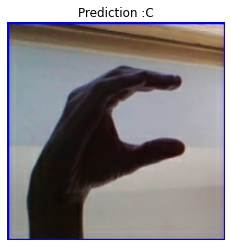

In [101]:

load_prep_pred_plot(model_3,"C_test.jpg")

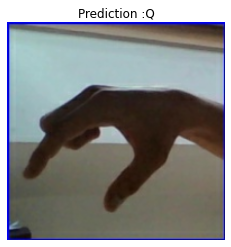

In [104]:
load_prep_pred_plot(model_3, "Q_test.jpg")

> that good but the validation accuracy isn't good for that we can use the `transfer learning` to make the model work properly